<a href="https://colab.research.google.com/github/dubnation/MLprojects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
from sympy import *

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [ ]:
df = df.rename(columns={'median_income': 'x', 'median_house_value': 'y'})
df = df[['x', 'y']]

In [ ]:
def linear_regression(df, learning_rate):
  w = 1
  b = 1

  while abs(cost_derivative_w(w, b, df)) > 0.00001:
    w_temp = w - (learning_rate) * cost_derivative_w(w, b, df)
    b_temp = b - (learning_rate) * cost_derivative_b(w, b, df)

    w = w_temp
    b = b_temp

    print(w, b)

  return [w, b]

In [ ]:
def cost_derivative_w(w, b, df):
  copy_df = df.copy()
  copy_df = copy_df[['x', 'y']]

  copy_df['predicted'] = copy_df['x'] * w + b
  copy_df['derivative_eval'] = (copy_df['predicted'] - copy_df['y'])*copy_df['x']

  return copy_df['derivative_eval'].sum()/copy_df.shape[0]

In [ ]:
def cost_derivative_b(w, b, df):
  copy_df = df.copy()
  copy_df = copy_df[['x', 'y']]

  copy_df['predicted'] = copy_df['x'] * w + b
  copy_df['derivative_eval'] = (copy_df['predicted'] - copy_df['y'])

  return copy_df['derivative_eval'].sum()/copy_df.shape[0]

In [ ]:
def cost_function(w, b, df):
  copy_df = df.copy()
  copy_df = copy_df[['x', 'y']]
  copy_df['predicted'] = copy_df['x'] * w + b
  copy_df['residual_squared'] = pow((copy_df['predicted'] - copy_df['y']), 2)

  print(copy_df.shape[0])
  return copy_df['residual_squared'].sum()/(copy_df.shape[0]*2)


In [ ]:
vars = linear_regression(df, 0.01)

Streaming output truncated to the last 5000 lines.
41032.924719498114 49622.32854230953
41032.92375577348 49622.333035325755
41032.92279381597 49622.337520103436
41032.92183362233 49622.34199665768
41032.92087518933 49622.34646500355
41032.91991851375 49622.35092515612
41032.91896359236 49622.3553771304
41032.91801042195 49622.35982094139
41032.9170589993 49622.36425660406
41032.91610932122 49622.36868413335
41032.915161384495 49622.37310354417
41032.91421518594 49622.37751485141
41032.91327072237 49622.38191806993
41032.9123279906 49622.386313214556
41032.91138698745 49622.3907003001
41032.91044770976 49622.39507934134
41032.90951015436 49622.39945035302
41032.90857431809 49622.40381334986
41032.9076401978 49622.40816834657
41032.90670779035 49622.412515357806
41032.905777092594 49622.416854398216
41032.904848101396 49622.42118548242
41032.903920813624 49622.425508625
41032.902995226155 49622.42982384052
41032.90207133588 49622.43413114351
41032.90114913968 49622.43843054849
41032.900

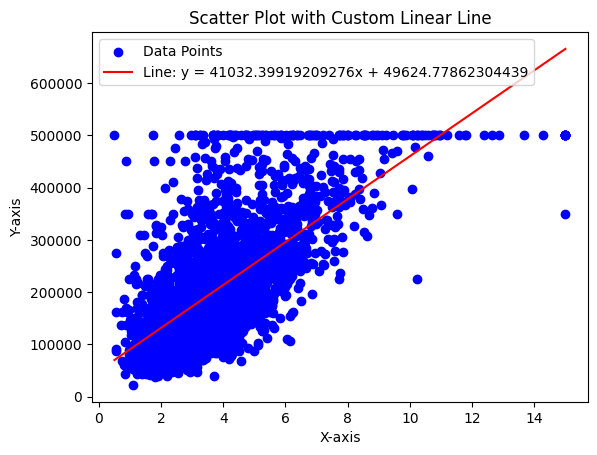

In [ ]:
slope = vars[0]
y_intercept = vars[1]

# Create the x values for the line (use the range of x_scatter for a better fit)
x_line = np.linspace(min(df['x']), max(df['x']), 100)
y_line = slope * x_line + y_intercept

# Create the scatter plot
plt.scatter(df['x'], df['y'], color='blue', label='Data Points')

# Plot the linear line
plt.plot(x_line, y_line, color='red', label=f'Line: y = {slope}x + {y_intercept}')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Custom Linear Line')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import numpy as np

In [ ]:
x = np.array([200, 17])
list(x)

[200, 17]